In [7]:
# Analiza i modyfikacja danych
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ewaluacja
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

models = [DecisionTreeClassifier(class_weight='balanced'), RandomForestClassifier(), KNeighborsClassifier(), MLPClassifier(random_state=1, max_iter=300), svm.SVC(kernel='linear')]
models_names = ['Tree', 'Forest', 'KNN', 'MLP', 'SVM']

def read_data():
    df = pd.read_csv('data/1.csv')
    print(df.head())
    return df;


def calculate_feeling_rate_distribution(df):
    print('DATA:')
    count = df.count()[0]
    data = []
    numbers = df['feel'].unique()
    for i in numbers:
        occur = df['feel'].value_counts()[i]
        percent = (occur / count) * 100
        value = round(percent, 2)
        data.append(value)
        print(str(i) + ' ' + str(round(percent, 2)) + '%')
        
    fig, ax = plt.subplots()
    ax.pie(data, labels=numbers, autopct='%1.1f%%')
    ax.set_title('Rozkład klas samopoczucia')

def print_df_information(df):
    print(df.head())
    print(df.info())
    print(df.describe())

def clean_up(df):
    df =  df.drop(columns=df.columns[[5, 6, 8]], axis=1)
    return df

def normalize(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

def standarize(x):
    scaler = StandardScaler()
    return scaler.fit_transform(x)


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def print_plot(metric, method_name, y):
    plt.bar(models_names, metric)
    addlabels(models_names, metric)

    #giving title to the plot
    plt.title(method_name)
    
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel(y)
    plt.show

def test_models(X_train, Y_train):  
    for model in models:
        print(str(model))
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        #Balanced acuurancy
        balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
        balanced.append(round(balanced_accurancy, 2))

        #Clasification report
        report = classification_report(Y_test, Y_pred, output_dict=True)
        print(classification_report(Y_test, Y_pred))

        accur = report['accuracy']
        accuracy.append(round(accur, 2))
    
        prec =  report['macro avg']['precision'] 
        precision.append(round(prec, 2))
        
        rec = report['macro avg']['recall'] 
        recall.append(round(rec, 2))
    
        #F1
        macro_f1 = report['macro avg']['f1-score']
        f1.append(round(macro_f1, 2))

        #Confiusion Matrix
        cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
        disp.plot()

def test_models_cross_validation(model_name, model, X_train, Y_train):
    scoring_metrics = ['accuracy', 'f1_micro','f1_macro', 'f1_weighted', 'recall_macro', 'precision_macro']
    scores_dict = {"accuracy":[], "f1_micro":[], 'f1_macro':[], 'f1_weighted':[], 'recall_macro':[], 'precision_macro':[]};
    results = []
    for metric in scoring_metrics:
        scores = cross_val_score(model, X_train, Y_train, cv=25, scoring=metric)
        scores_dict[metric].append(scores)
    return scores_dict

def test_models_cv_hiper(model_name, model, X_train, Y_train):
    scoring_metrics = ['accuracy', 'f1_micro','f1_macro', 'f1_weighted', 'recall_macro', 'precision_macro']
    scores_dict = {"accuracy":[], "f1_micro":[], 'f1_macro':[], 'f1_weighted':[], 'recall_macro':[], 'precision_macro':[]};
    results = []
    for metric in scoring_metrics:
        scores = cross_val_score(model, X_train, Y_train, cv=5, scoring=metric)
        scores_dict[metric].append(scores) 
    return scores_dict

#CROSS VAL FIGURE
def get_figure_for_metric(metric, res, ytitle, title):
# Plotting
    iterations = np.arange(1,  26)
    plt.figure(figsize=(10, 6))
    for model in models:
        index = models.index(model)
        plt.plot(np.array(iterations), np.array(res[index][metric]).flatten(), marker='o', linestyle='-', label=models_names[index])
        print(models_names[index])
        print(np.array(res[index][metric]).mean())
    
    plt.title(title)
    plt.xlabel('Iteracja')
    plt.ylabel(ytitle)
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_cross_val_results(res, X_train, Y_train):
    for model in models:
        index = models.index(model)
        result = test_models_cross_validation(models_names[index], model, X_train, Y_train)
        res.append(result)


def get_figure_for_metric(metric, res, ytitle, title):
# Plotting
    iterations = np.arange(1,  26)
    plt.figure(figsize=(10, 6))
    
    for model in models:
        index = models.index(model)
        plt.plot(np.array(iterations), np.array(res[index][metric]).flatten(), marker='o', linestyle='-', label=models_names[index])
        print(models_names[index])
        print(np.array(res[index][metric]).mean())
    
    plt.title(title)
    plt.xlabel('Iteracja')
    plt.ylabel(ytitle)
    plt.legend()
    plt.grid(True)


def get_stats(res):

    metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'f1_micro', 'f1_weighted']
    for metric in metrics:
        print(metric)
        for model in models:
            index = models.index(model)
            print(str(np.array(res[index][metric]).mean()))
            

In [8]:
df = read_data()


   steps  heart_rate_avg  max_heart  min_heart  raw_intensity_avg  \
0      0            80.0         80         80             0.0000   
1      0            80.0         80         80             0.0000   
2     37            80.0         80         80            13.8667   
3    101            80.0         80         80            40.2167   
4    398            82.0         90         80            53.5167   

   time_of_day        date  hour  user_id  feel  
0            2  2023-09-04     7    85816     5  
1            3  2023-09-04     8    85816     5  
2            3  2023-09-04     9    85816     5  
3            3  2023-09-04    10    85816     5  
4            3  2023-09-04    11    85816     5  


DATA:
5 2.2%
4 49.77%
3 45.85%
2 2.18%


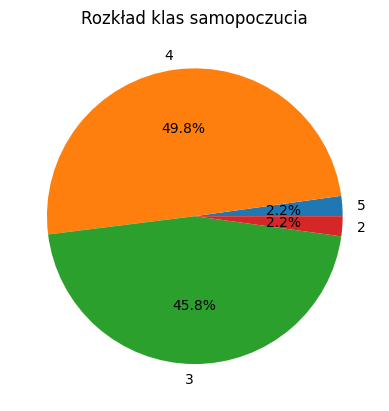

In [9]:
calculate_feeling_rate_distribution(df)

In [10]:
df = clean_up(df)

In [11]:
Y = df['feel'].values
x = df.drop(['feel'], axis=1).values
X = normalize(x)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71830, stratify=Y)

X_train = normalize(X_train)
X_test = normalize(X_test)

#X_train = standarize(X_train)
#X_test = standarize(X_test)

In [12]:
res = []
calculate_cross_val_results(res, X_train, Y_train)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetric

accuracy
0.5627221983683984
0.6685358522971232
0.6304765993988837
0.6635766423357664
0.6225032202662086
precision_macro
0.31986873648058367
0.3446978960190998
0.31658344736679056
0.3328839975792162
0.3118411773667507
recall_macro
0.33175882020277214
0.35469397163455335
0.3292972406423651
0.346221301552237
0.32481584352566256
f1_macro
0.3158277213035205
0.34263337127394805
0.32215470437597526
0.3384989946357808
0.31738555857021405
f1_micro
0.5574388149420352
0.6682288535852298
0.6304765993988837
0.6635766423357664
0.6225032202662086
f1_weighted
0.5610474767817522
0.6541107134698337
0.6167659445809872
0.6480748734405549
0.6076960112180246


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#ADASYN
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = ADASYN(sampling_strategy='minority').fit_resample(X_train, Y_train)

In [14]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetric

accuracy
0.6341263977143984
0.7248204521944731
0.6807704053987487
0.5899147825230284
0.5232431899906408
precision_macro
0.5018196249642106
0.5574314692096229
0.5045771534451293
0.44982663277789314
0.4126243312778166
recall_macro
0.498639463530697
0.5512254344914789
0.5156506649536232
0.4471160030304084
0.3960756457516614
f1_macro
0.49778872259319834
0.5561206063146343
0.5055771393627875
0.4408147074704785
0.389801440869438
f1_micro
0.632570809319738
0.7212462440273878
0.6807704053987487
0.5899147825230284
0.5232431899906408
f1_weighted
0.6330267412778817
0.7216443635313312
0.6662457570605068
0.5796381944884835
0.5125592421987382


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   feel
0     3
1     3
2     3
3     4
4     5
DATA:
3 31.05%
4 33.69%
5 1.49%
2 33.77%


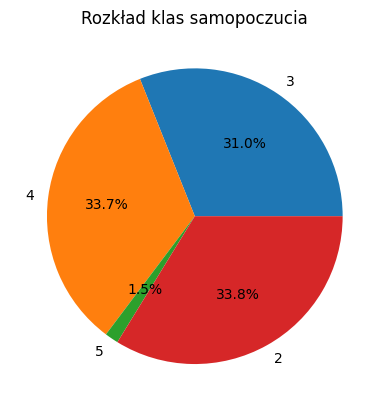

In [15]:
df_resampled = pd.DataFrame(Y_resampled, columns=['feel'])
print(df_resampled.head())
calculate_feeling_rate_distribution(df_resampled)

Tree
0.6341263977143984
Forest
0.7248204521944731
KNN
0.6807704053987487
MLP
0.5899147825230284
SVM
0.5232431899906408


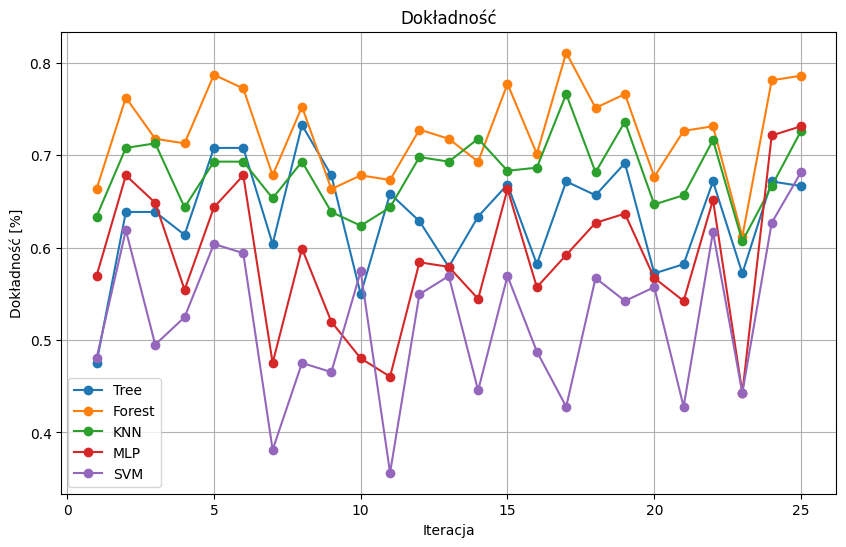

In [16]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.49778872259319834
Forest
0.5561206063146343
KNN
0.5055771393627875
MLP
0.4408147074704785
SVM
0.389801440869438


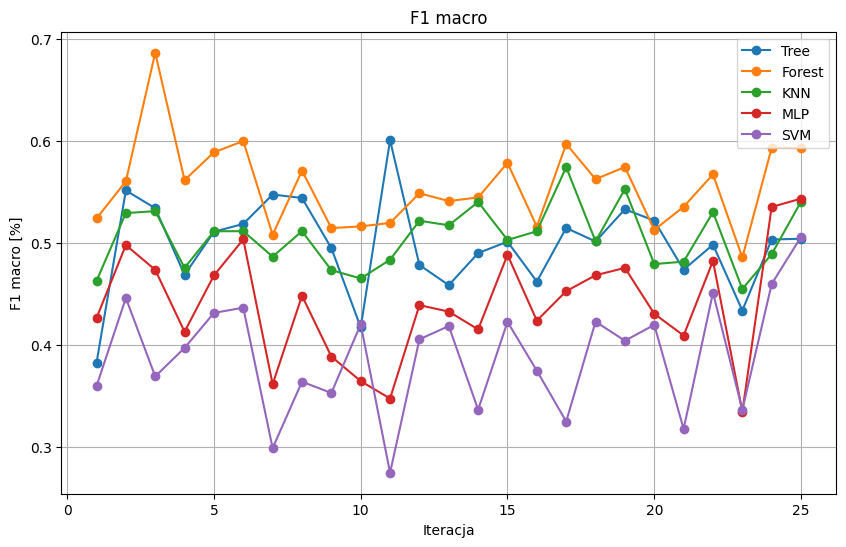

In [17]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

Tree
0.632570809319738
Forest
0.7212462440273878
KNN
0.6807704053987487
MLP
0.5899147825230284
SVM
0.5232431899906408


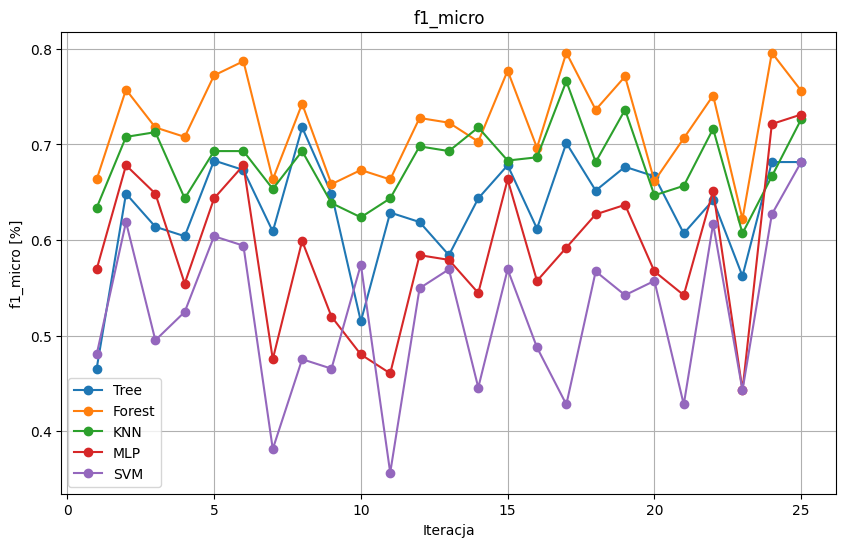

In [18]:
get_figure_for_metric('f1_micro', res, "f1_micro [%]", "f1_micro")

Tree
0.6330267412778817
Forest
0.7216443635313312
KNN
0.6662457570605068
MLP
0.5796381944884835
SVM
0.5125592421987382


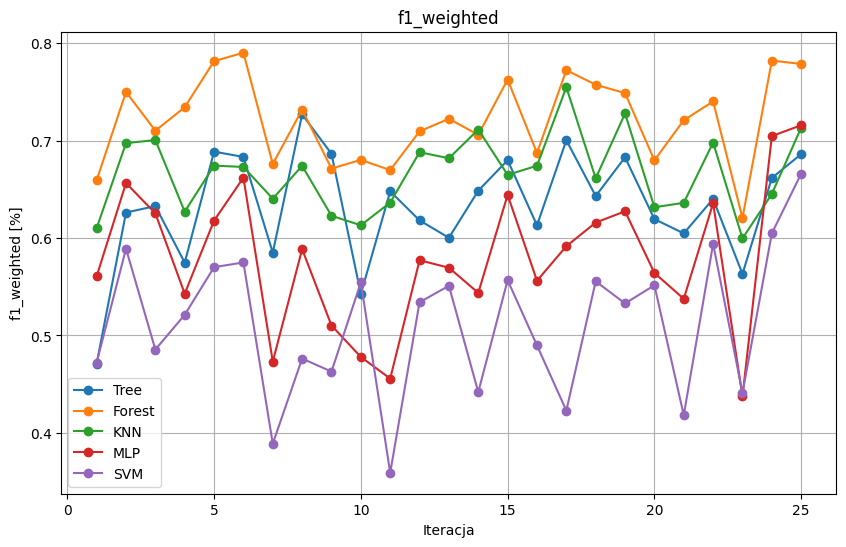

In [19]:
get_figure_for_metric('f1_weighted', res, "f1_weighted [%]", "f1_weighted")

Tree
0.5018196249642106
Forest
0.5574314692096229
KNN
0.5045771534451293
MLP
0.44982663277789314
SVM
0.4126243312778166


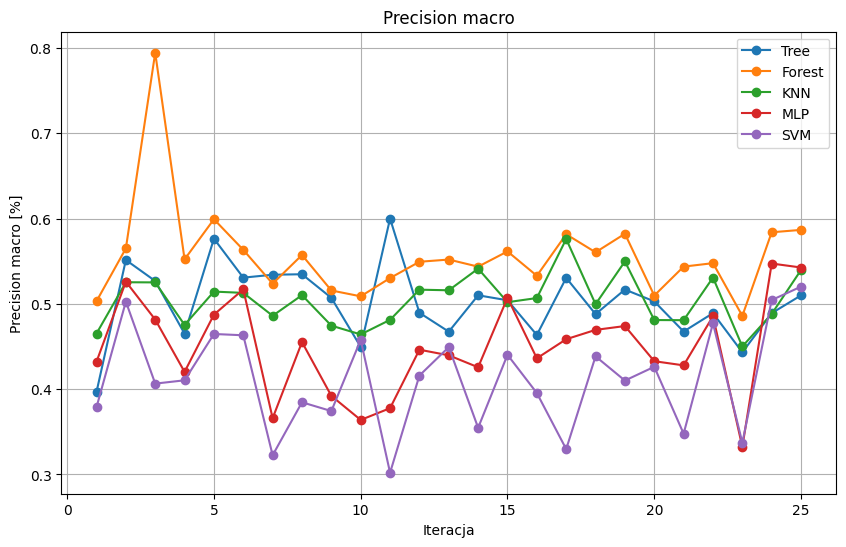

In [20]:
get_figure_for_metric('precision_macro', res, "Precision macro [%]", "Precision macro")

Tree
0.498639463530697
Forest
0.5512254344914789
KNN
0.5156506649536232
MLP
0.4471160030304084
SVM
0.3960756457516614


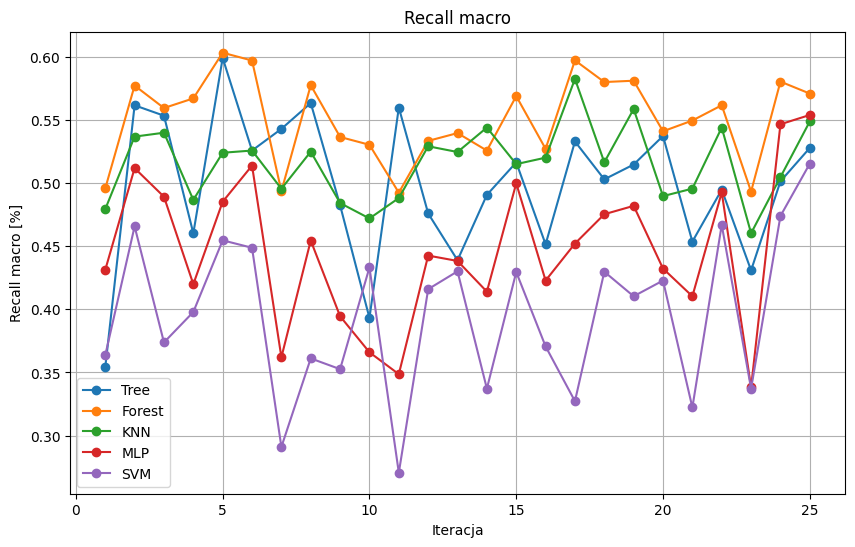

In [21]:
get_figure_for_metric('recall_macro', res, "Recall macro [%]", "Recall macro")

Tree
0.632570809319738
Forest
0.7212462440273878
KNN
0.6807704053987487
MLP
0.5899147825230284
SVM
0.5232431899906408


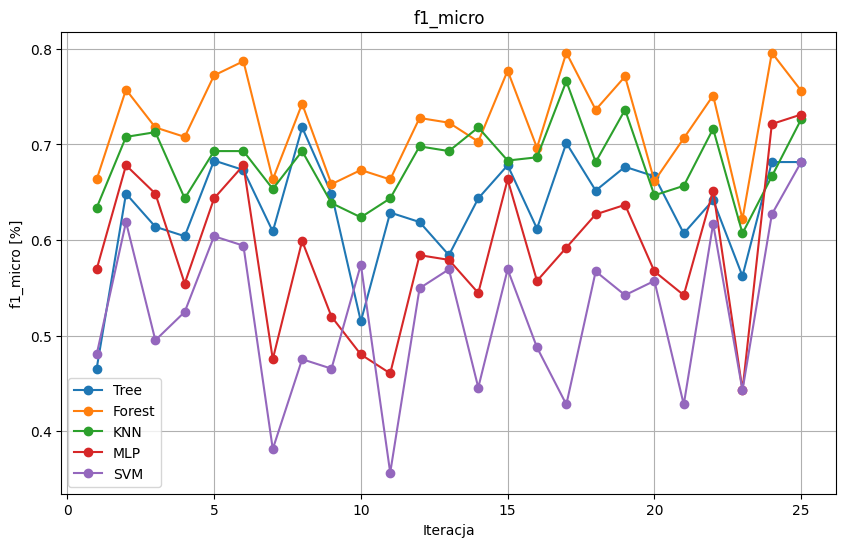

In [22]:
get_figure_for_metric('f1_micro', res, "f1_micro [%]", "f1_micro")

Tree
0.6330267412778817
Forest
0.7216443635313312
KNN
0.6662457570605068
MLP
0.5796381944884835
SVM
0.5125592421987382


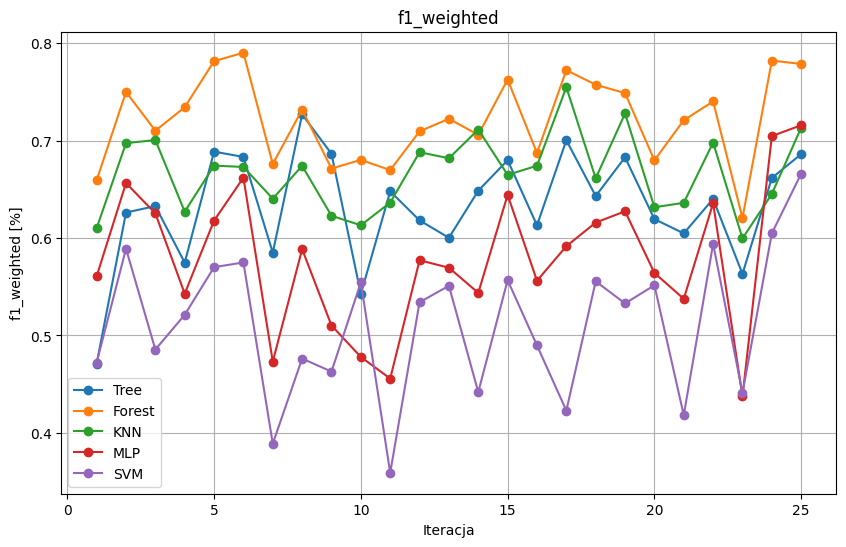

In [23]:
get_figure_for_metric('f1_weighted', res, "f1_weighted [%]", "f1_weighted")

   feel
0     3
1     3
2     3
3     4
4     5
DATA:
3 25.0%
4 25.0%
5 25.0%
2 25.0%


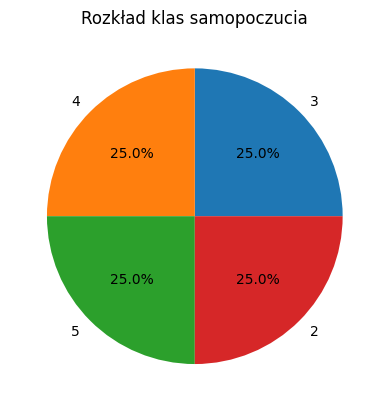

In [24]:
#SMOTE
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

df_resampled = pd.DataFrame(Y_resampled, columns=['feel'])
print(df_resampled.head())
calculate_feeling_rate_distribution(df_resampled)

In [25]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.7152762101150423
0.8044904493162578
0.7386639895810723
0.5773133275450401
0.46291404384632073
precision_macro
0.7111007011736297
0.7986736465759156
0.7258753957325507
0.5773564123257511
0.4973776851528523
recall_macro
0.7158845478489902
0.8027655838454786
0.73869622475856
0.5772892888498684
0.46290166812993855
f1_macro
0.7147681869461421
0.804019961381721
0.7212929036272251
0.5672026026414946
0.45428283729631624
f1_micro
0.7163077924896897
0.8043455611026699
0.7386639895810723
0.5773133275450401
0.46291404384632073
f1_weighted
0.7146660612348841
0.8067880088479064
0.7212867566768054
0.5672216496604663
0.45429234634100607


Tree
0.7152762101150423
Forest
0.8044904493162578
KNN
0.7386639895810723
MLP
0.5773133275450401
SVM
0.46291404384632073


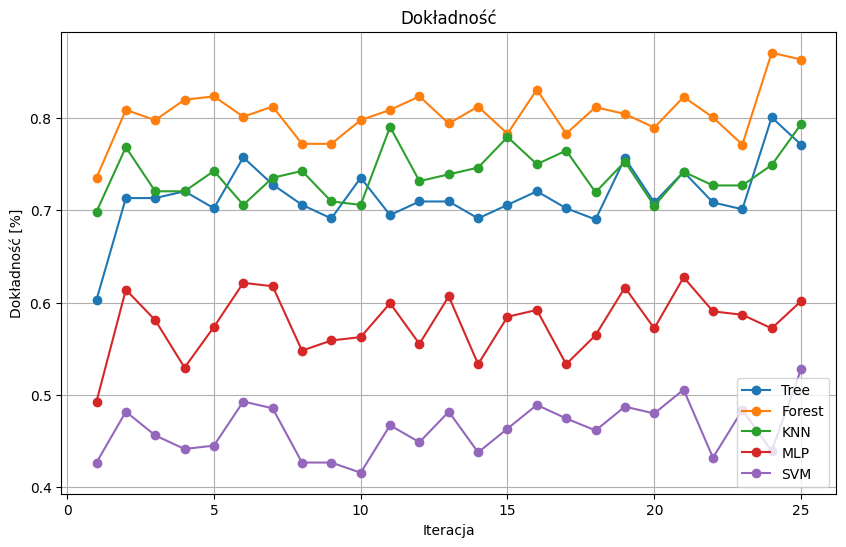

In [26]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.7147681869461421
Forest
0.804019961381721
KNN
0.7212929036272251
MLP
0.5672026026414946
SVM
0.45428283729631624


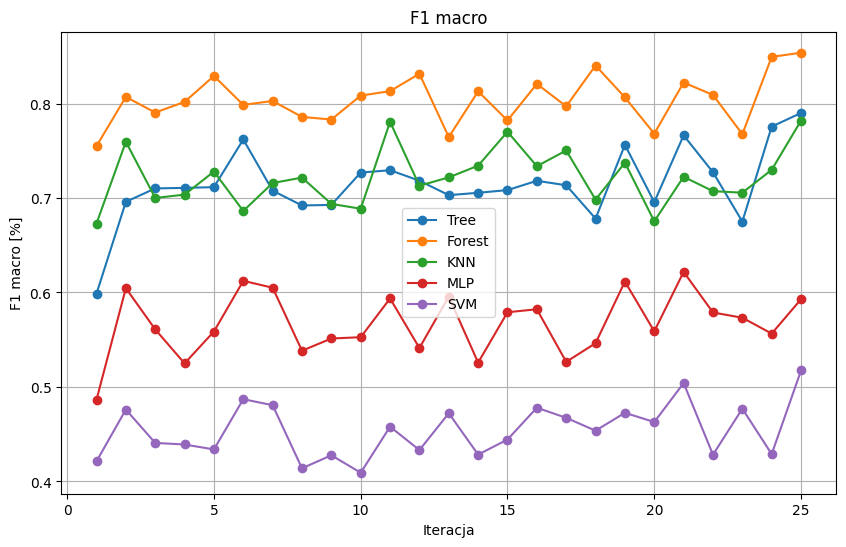

In [27]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

Tree
0.7163077924896897
Forest
0.8043455611026699
KNN
0.7386639895810723
MLP
0.5773133275450401
SVM
0.46291404384632073


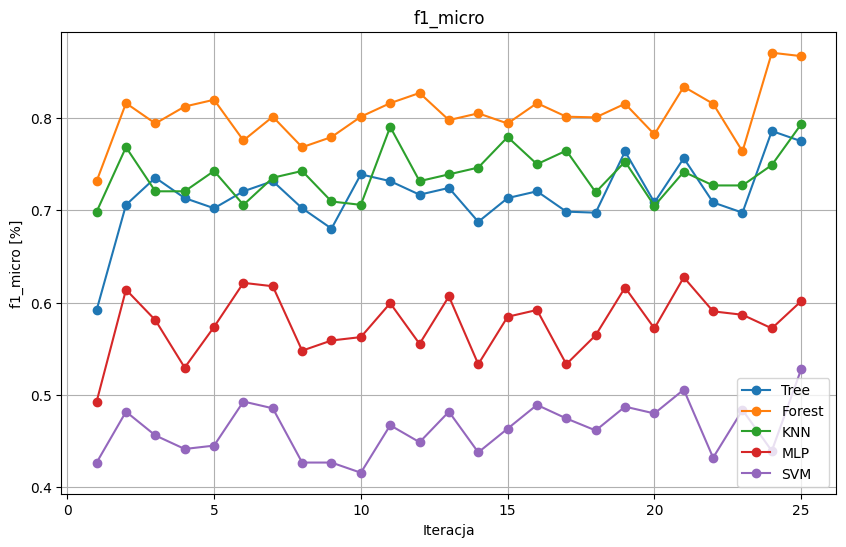

In [28]:
get_figure_for_metric('f1_micro', res, "f1_micro [%]", "f1_micro")

Tree
0.7146660612348841
Forest
0.8067880088479064
KNN
0.7212867566768054
MLP
0.5672216496604663
SVM
0.45429234634100607


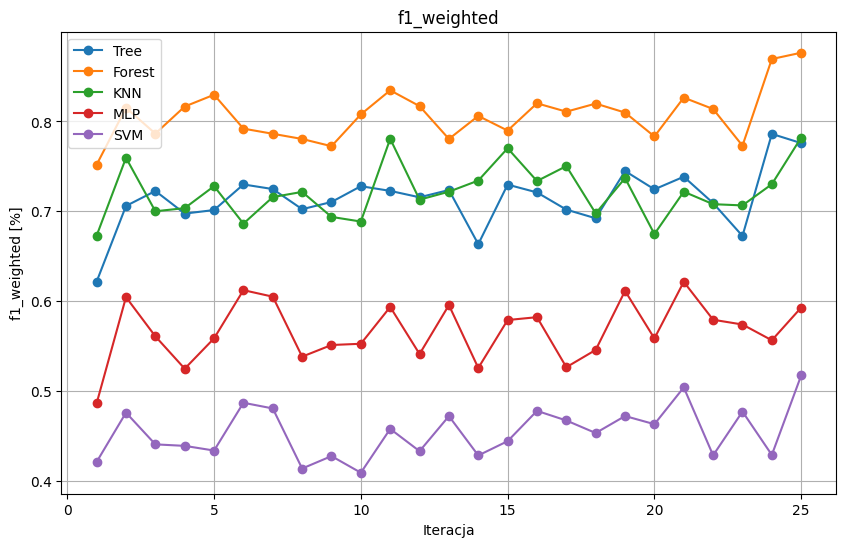

In [29]:
get_figure_for_metric('f1_weighted', res, "f1_weighted [%]", "f1_weighted")

Tree
0.7111007011736297
Forest
0.7986736465759156
KNN
0.7258753957325507
MLP
0.5773564123257511
SVM
0.4973776851528523


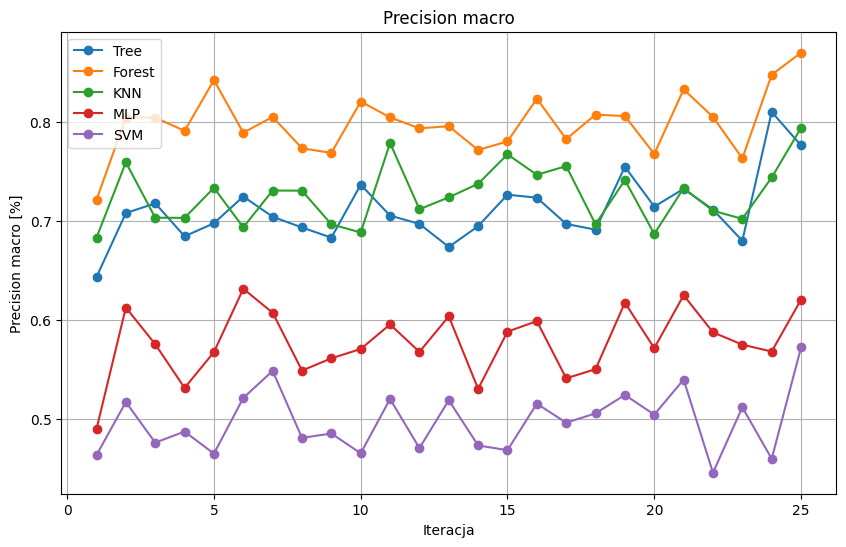

In [30]:
get_figure_for_metric('precision_macro', res, "Precision macro [%]", "Precision macro")

Tree
0.7158845478489902
Forest
0.8027655838454786
KNN
0.73869622475856
MLP
0.5772892888498684
SVM
0.46290166812993855


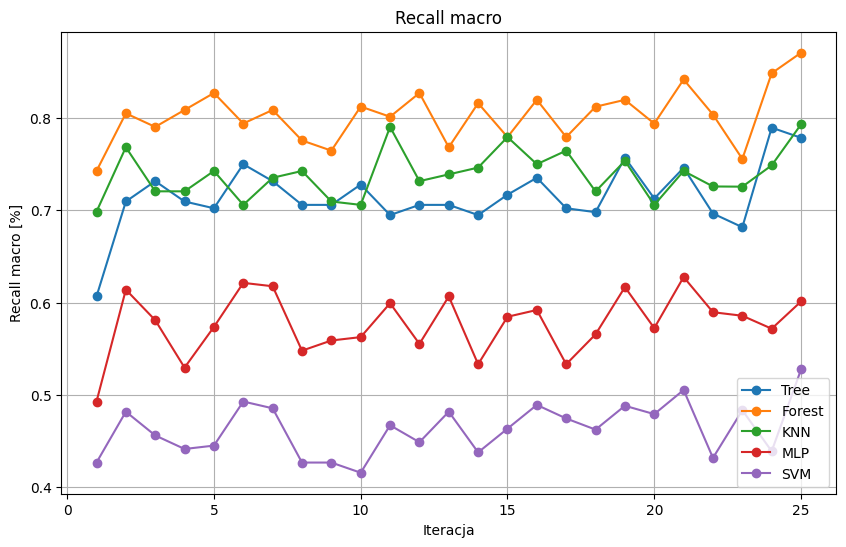

In [31]:
get_figure_for_metric('recall_macro', res, "Recall macro [%]", "Recall macro")

Tree
0.7146660612348841
Forest
0.8067880088479064
KNN
0.7212867566768054
MLP
0.5672216496604663
SVM
0.45429234634100607


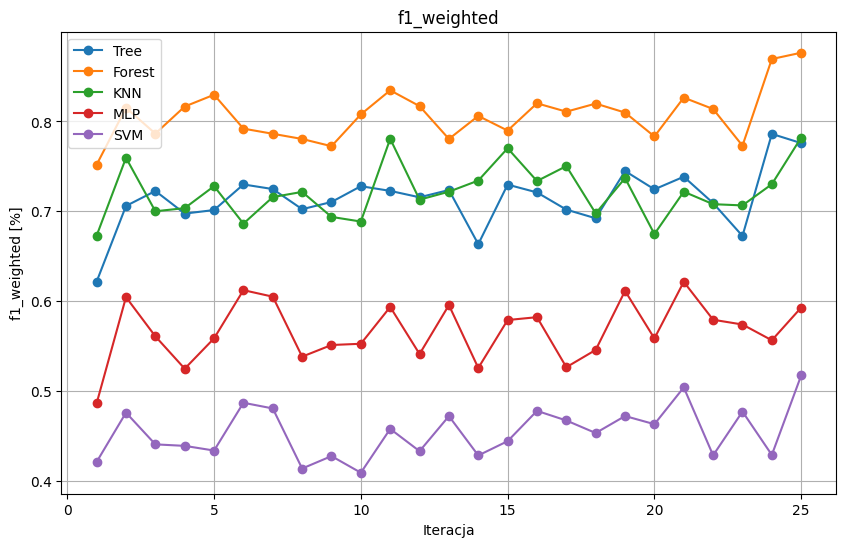

In [32]:
get_figure_for_metric('f1_weighted', res, "f1_weighted [%]", "f1_weighted")


In [33]:
#Random Over Sampler
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = RandomOverSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)
 

   feel
0     3
1     3
2     3
3     4
4     5
DATA:
3 25.0%
4 25.0%
5 25.0%
2 25.0%


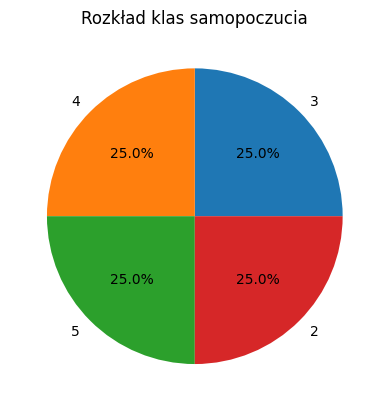

In [34]:
df_resampled = pd.DataFrame(Y_resampled, columns=['feel'])
print(df_resampled.head())
calculate_feeling_rate_distribution(df_resampled)

In [35]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.7993444757976991
0.8460131321901456
0.7767994356414153
0.5528652051226395
0.4422965053179944
precision_macro
0.796343143628115
0.845334149135551
0.7659823219364948
0.5549389249955943
0.4731633084636699
recall_macro
0.7998441615452151
0.8451712028094821
0.7768064091308164
0.5528467954345918
0.44228050921861284
f1_macro
0.7931215632558386
0.8461355016094204
0.7680018237103464
0.5455562124604775
0.43910573428469263
f1_micro
0.8008096375081398
0.8496928586932927
0.7767994356414153
0.5528652051226395
0.4422965053179944
f1_weighted
0.7938739460995339
0.8449225282744594
0.7680079260922262
0.5455706145214756
0.43912393276752654


Tree
0.7993444757976991
Forest
0.8460131321901456
KNN
0.7767994356414153
MLP
0.5528652051226395
SVM
0.4422965053179944


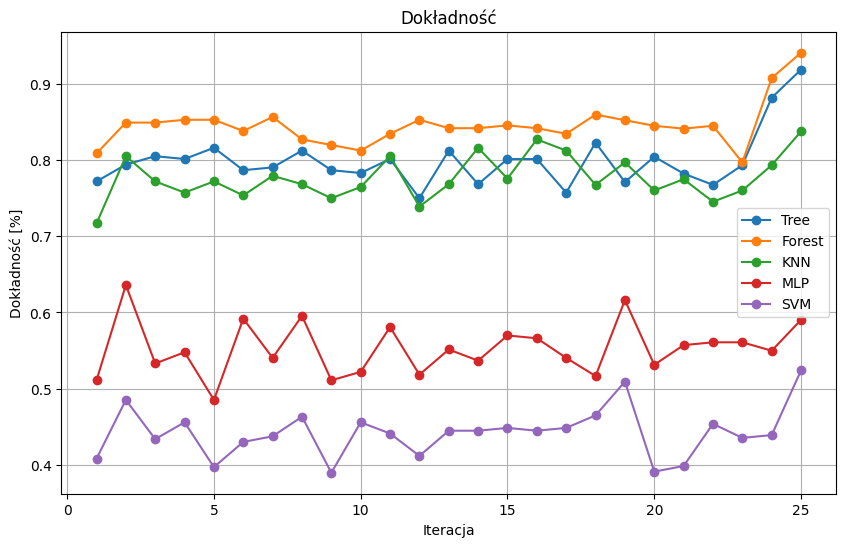

In [36]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.796343143628115
Forest
0.845334149135551
KNN
0.7659823219364948
MLP
0.5549389249955943
SVM
0.4731633084636699


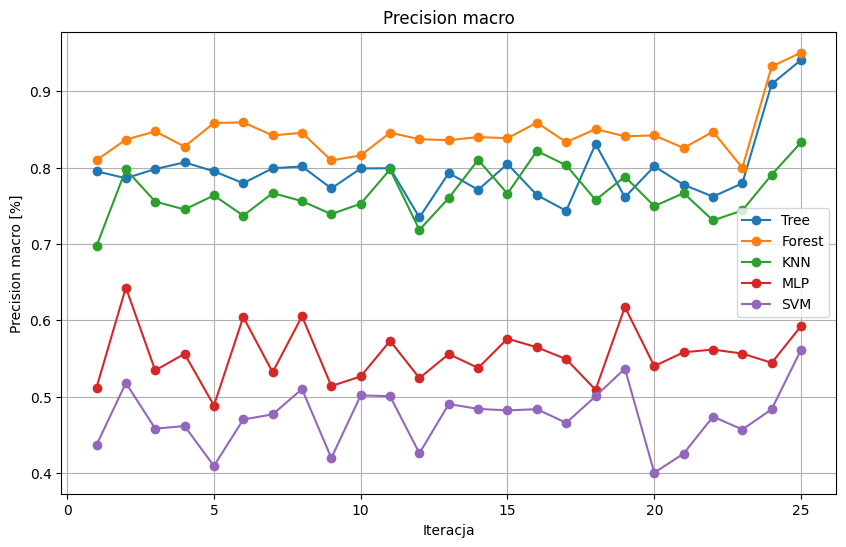

In [37]:
get_figure_for_metric('precision_macro', res, "Precision macro [%]", "Precision macro")

Tree
0.7998441615452151
Forest
0.8451712028094821
KNN
0.7768064091308164
MLP
0.5528467954345918
SVM
0.44228050921861284


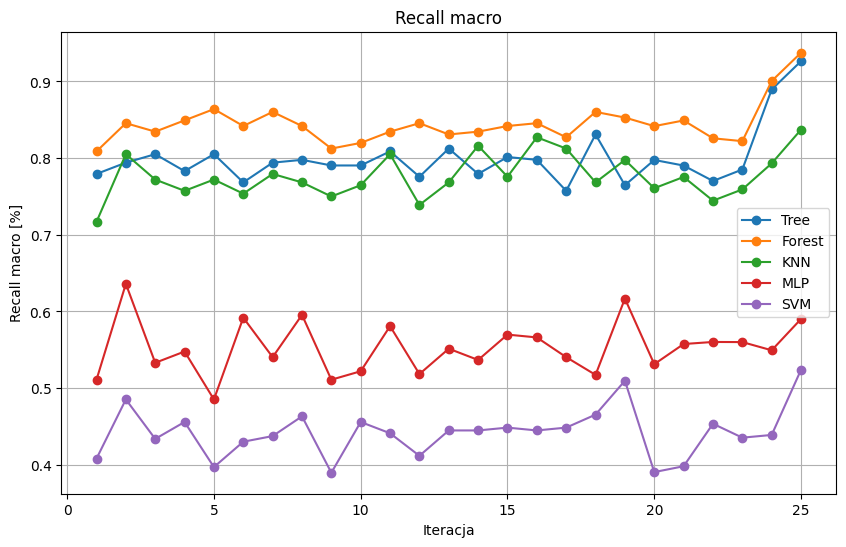

In [38]:
get_figure_for_metric('recall_macro', res, "Recall macro [%]", "Recall macro")

Tree
0.7931215632558386
Forest
0.8461355016094204
KNN
0.7680018237103464
MLP
0.5455562124604775
SVM
0.43910573428469263


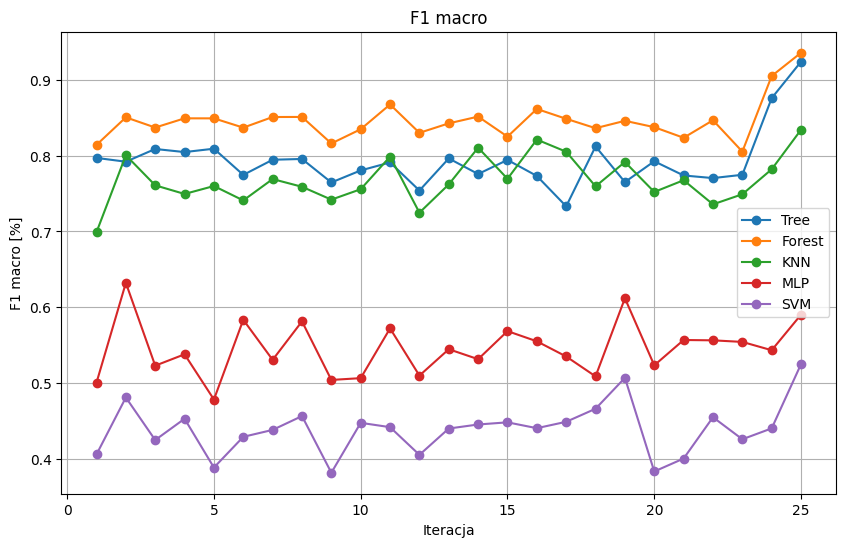

In [39]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

Tree
0.8008096375081398
Forest
0.8496928586932927
KNN
0.7767994356414153
MLP
0.5528652051226395
SVM
0.4422965053179944


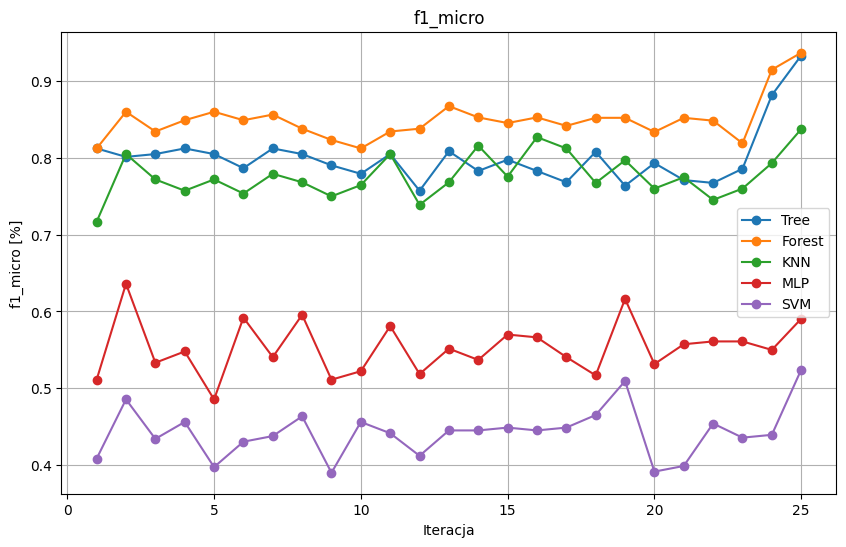

In [40]:
get_figure_for_metric('f1_micro', res, "f1_micro [%]", "f1_micro")

Tree
0.7938739460995339
Forest
0.8449225282744594
KNN
0.7680079260922262
MLP
0.5455706145214756
SVM
0.43912393276752654


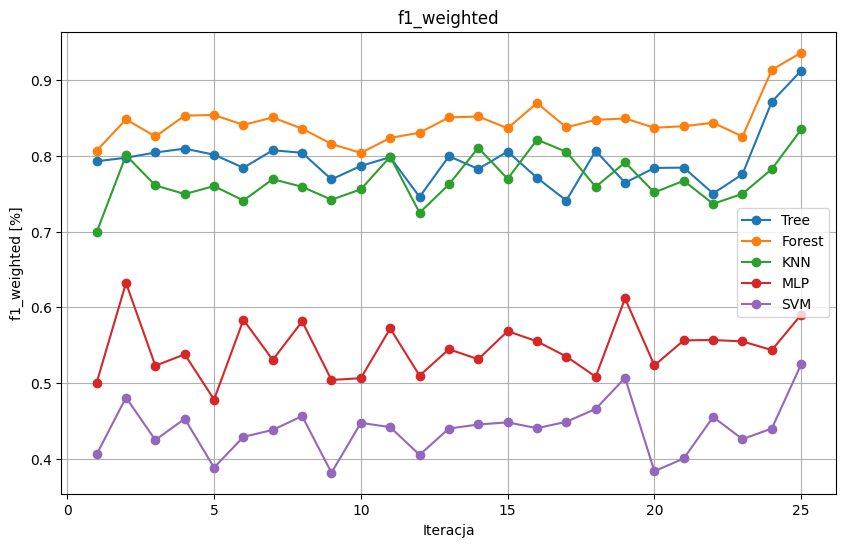

In [41]:
get_figure_for_metric('f1_weighted', res, "f1_weighted [%]", "f1_weighted")

In [42]:
#SMOTE HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

# Define the hyperparameter grid for each classifier
param_grid_decision_tree = {'class_weight':['balanced', None], 
                            'max_depth': [None, 10, 20, 30, 40, 50, 100], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4], 
                            'criterion' :['gini', 'entropy', 'log_loss']}
param_grid_random_forest = {'class_weight':['balanced', 'balanced_subsample', None], 
                            'n_estimators': [5, 10, 100, 200], 
                            'max_depth': [None, 10, 30], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4],
                            'criterion' : ['gini', 'entropy', 'log_loss']}
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 
                  'activation': ['relu', 'tanh', 'logistic'], 
                  'max_iter': [200, 300, 400]}
param_grid_svm = {'C': [0.1, 1, 10, 20], 
                  'kernel': ['linear', 'rbf'], 
                  'gamma': ['scale', 'auto']}
# Create classifiers with balanced class weights
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
svm_classifier = svm.SVC()

In [43]:
# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_decision_tree.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)

Best hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [44]:
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_random_forest.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Random Forest:", grid_search_random_forest.best_params_)

Best hyperparameters for Random Forest: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [45]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_resampled, Y_resampled)
print("Best hyperparameters for K-Nearest Neighbours:", grid_search_knn.best_params_)

Best hyperparameters for K-Nearest Neighbours: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}


In [46]:
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_mlp.fit(X_resampled, Y_resampled)
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

Best hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 400}


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm.fit(X_resampled, Y_resampled)
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)

Best hyperparameters for SVM: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}


In [48]:
#SMOTE HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

#Found in previous Grid search 
models = [DecisionTreeClassifier(class_weight=None, criterion= 'entropy', max_depth=40, min_samples_leaf=1, min_samples_split=2), 
          RandomForestClassifier(class_weight='balanced_subsample', criterion= 'gini', max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200), 
          KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='brute'), 
          MLPClassifier(max_iter=400, activation= 'relu', hidden_layer_sizes=(50,50)),
          svm.SVC(C=20, gamma='scale', kernel= 'rbf')]



In [49]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.7170441719123075
0.8056669199044931
0.7610532884740613
0.6839022140221402
0.6710945300629477
precision_macro
0.7173856863238999
0.8051362844188986
0.7480194421711367
0.6750914436525365
0.6661720505069265
recall_macro
0.7219249341527656
0.8043854258121158
0.7611194029850746
0.6923046532045655
0.671095258999122
f1_macro
0.7151980750509642
0.8010806018929212
0.7469963789770678
0.6785792815692517
0.6579238503846004
f1_micro
0.7157195571955719
0.8058118081180813
0.7610532884740613
0.6839179509442153
0.6710945300629477
f1_weighted
0.7147711706666837
0.8040681515144996
0.7469733550610356
0.6763170201331223
0.6579309881726586


Tree
0.7170441719123075
Forest
0.8056669199044931
KNN
0.7610532884740613
MLP
0.6839022140221402
SVM
0.6710945300629477


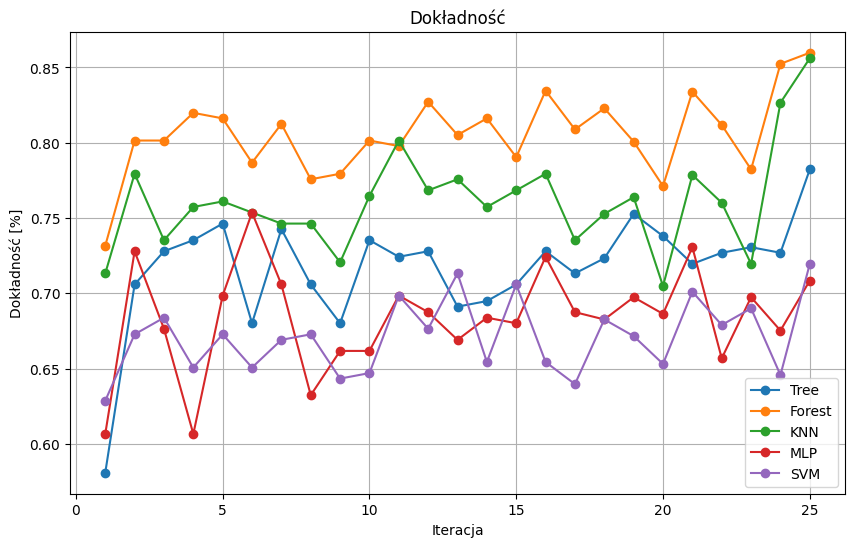

In [50]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.7151980750509642
Forest
0.8010806018929212
KNN
0.7469963789770678
MLP
0.6785792815692517
SVM
0.6579238503846004


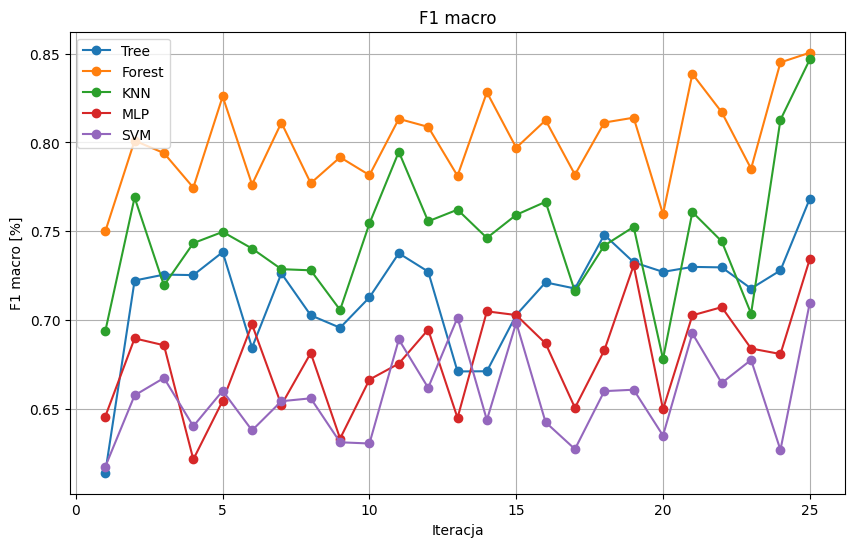

In [51]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

Tree
0.7157195571955719
Forest
0.8058118081180813
KNN
0.7610532884740613
MLP
0.6839179509442153
SVM
0.6710945300629477


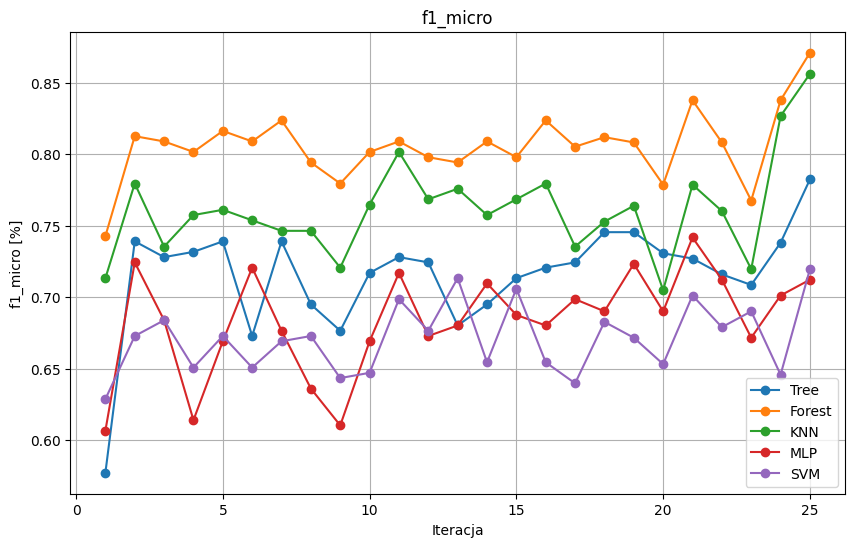

In [52]:
get_figure_for_metric('f1_micro', res, "f1_micro [%]", "f1_micro")

Tree
0.7219249341527656
Forest
0.8043854258121158
KNN
0.7611194029850746
MLP
0.6923046532045655
SVM
0.671095258999122


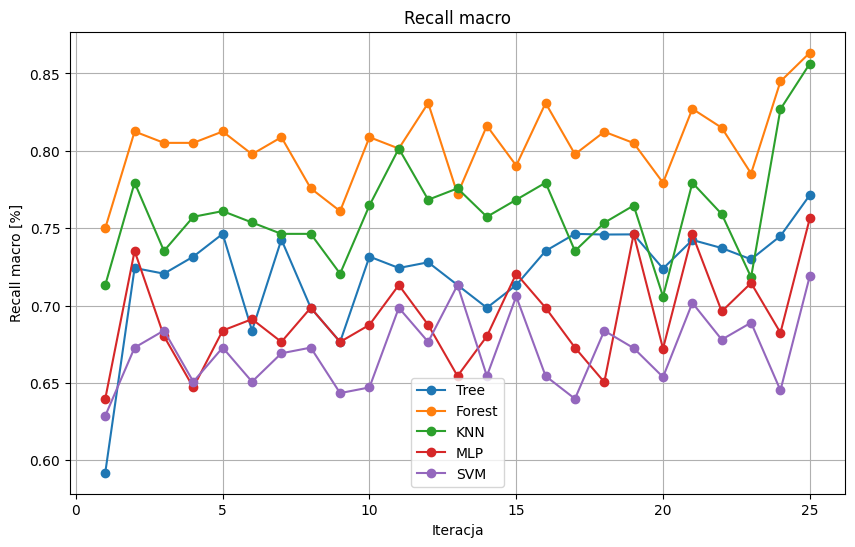

In [53]:
get_figure_for_metric('recall_macro', res, "Recall macro [%]", "Recall macro")

Tree
0.7173856863238999
Forest
0.8051362844188986
KNN
0.7480194421711367
MLP
0.6750914436525365
SVM
0.6661720505069265


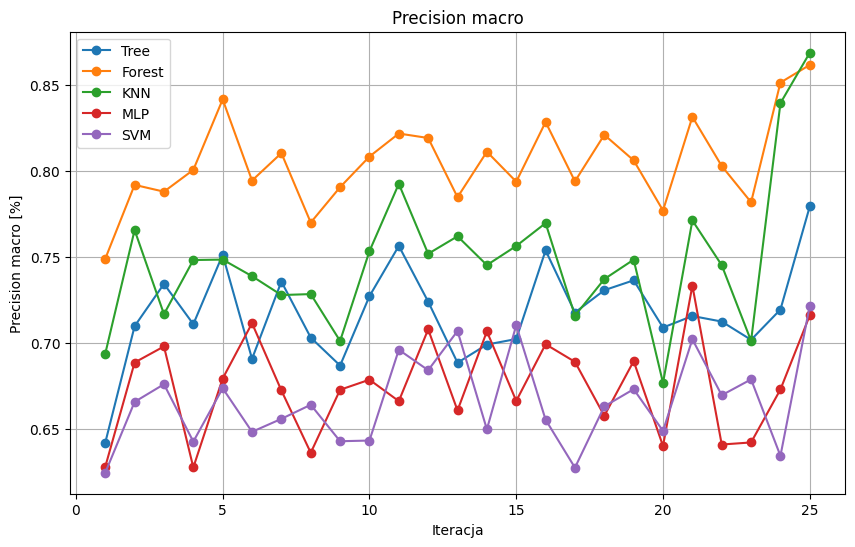

In [54]:
get_figure_for_metric('precision_macro', res, "Precision macro [%]", "Precision macro")

Tree
0.7147711706666837
Forest
0.8040681515144996
KNN
0.7469733550610356
MLP
0.6763170201331223
SVM
0.6579309881726586


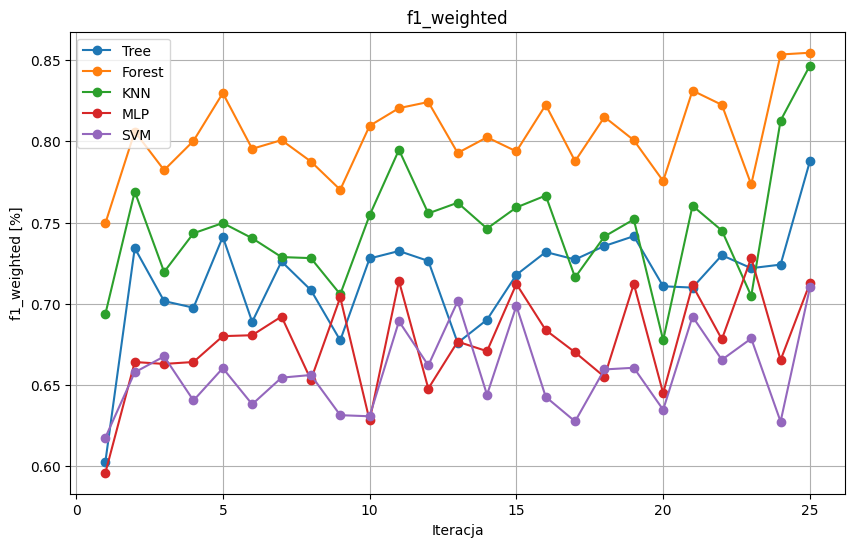

In [55]:
get_figure_for_metric('f1_weighted', res, "f1_weighted [%]", "f1_weighted")

DecisionTreeClassifier(criterion='entropy', max_depth=40)
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        19
           3       0.99      1.00      0.99       391
           4       1.00      0.99      1.00       425
           5       1.00      1.00      1.00        19

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854

RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       min_samples_split=5, n_estimators=200)
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        19
           3       0.99      0.99      0.99       391
           4       0.99      0.99      0.99       425
           5       1.00      1.00      1.00        19

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99    

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        19
           3       0.65      0.76      0.70       391
           4       0.72      0.67      0.70       425
           5       0.00      0.00      0.00        19

    accuracy                           0.68       854
   macro avg       0.34      0.36      0.35       854
weighted avg       0.66      0.68      0.67       854

SVC(C=20)
              precision    recall  f1-score   support

           2       1.00      0.16      0.27        19
           3       0.76      0.69      0.72       391
           4       0.72      0.83      0.77       425
           5       1.00      0.16      0.27        19

    accuracy                           0.74       854
   macro avg       0.87      0.46      0.51       854
weighted avg       0.75      0.74      0.73       854



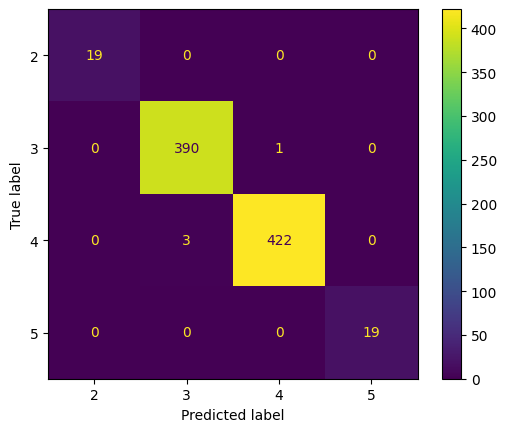

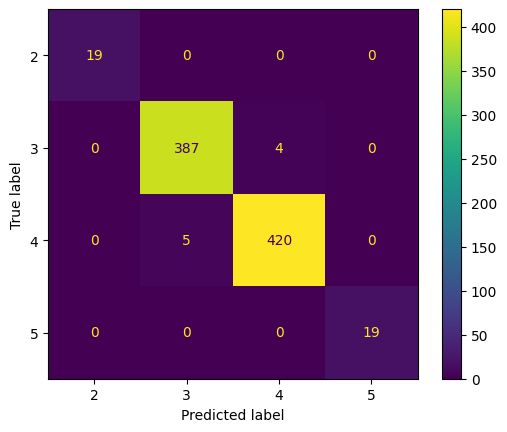

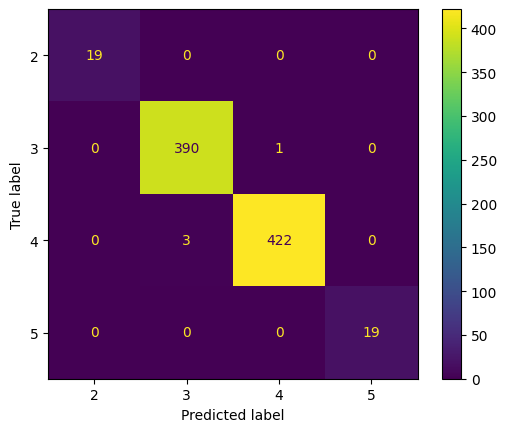

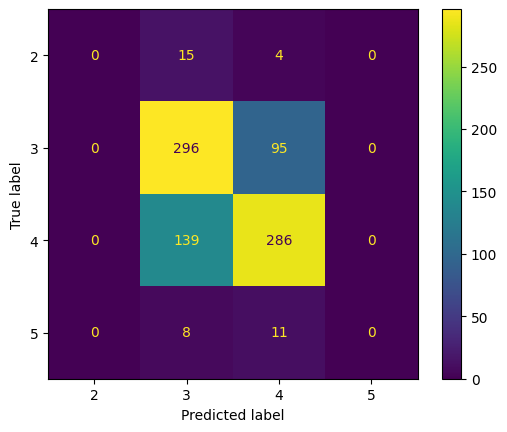

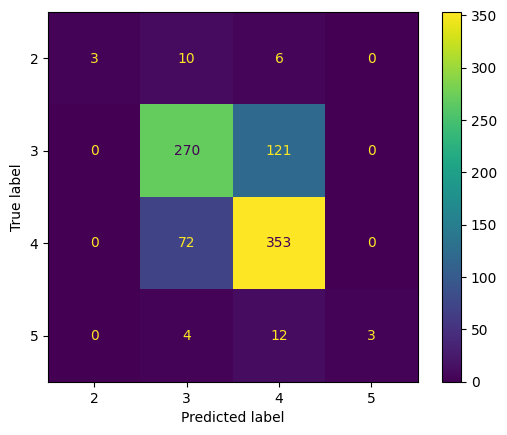

In [56]:
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

test_models(X_test, Y_test) 

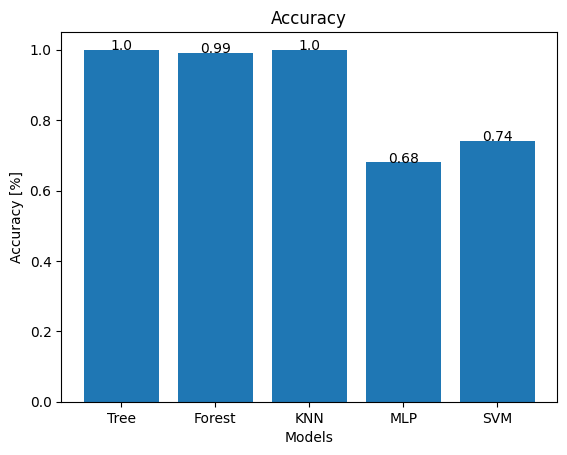

In [57]:
print_plot(accuracy, 'Accuracy', 'Accuracy [%]')

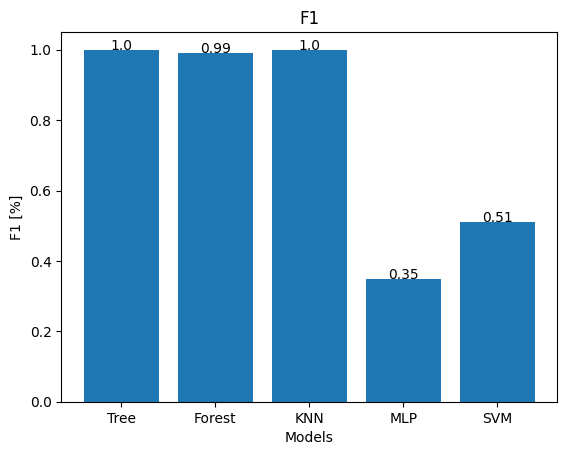

In [58]:
print_plot(f1, 'F1', 'F1 [%]')

In [59]:
#ROS HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []
X_resampled, Y_resampled =  RandomOverSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

# Define the hyperparameter grid for each classifier
param_grid_decision_tree = {'class_weight':['balanced', None], 
                            'max_depth': [None, 10, 20, 30, 40, 50, 100], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4], 
                            'criterion' :['gini', 'entropy', 'log_loss']}
param_grid_random_forest = {'class_weight':['balanced', 'balanced_subsample', None], 
                            'n_estimators': [5, 10, 100, 200], 
                            'max_depth': [None, 10, 30], 
                            'min_samples_split': [2, 5, 10], 
                            'min_samples_leaf': [1, 2, 4],
                            'criterion' : ['gini', 'entropy', 'log_loss']}
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 
                  'activation': ['relu', 'tanh', 'logistic'], 
                  'max_iter': [200, 300, 400]}
param_grid_svm = {'C': [0.1, 1, 10, 20], 
                  'kernel': ['linear', 'rbf'], 
                  'gamma': ['scale', 'auto']}

# Create classifiers with balanced class weights
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
svm_classifier = svm.SVC()

# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')

In [60]:
# Create GridSearchCV instances for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='f1_macro')
grid_search_decision_tree.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)

Best hyperparameters for Decision Tree: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [61]:
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1_macro')
grid_search_random_forest.fit(X_resampled, Y_resampled)
print("Best hyperparameters for Random Forest:", grid_search_random_forest.best_params_)

Best hyperparameters for Random Forest: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [62]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_resampled, Y_resampled)
print("Best hyperparameters for K-Nearest Neighbours:", grid_search_knn.best_params_)

Best hyperparameters for K-Nearest Neighbours: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}


In [63]:
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_macro')
grid_search_mlp.fit(X_resampled, Y_resampled)
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

Best hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 400}


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm.fit(X_resampled, Y_resampled)
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)

Best hyperparameters for SVM: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}


In [65]:
#ROS HYPER
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

X_resampled, Y_resampled =  RandomOverSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, Y_train)

#Found in previous Grid search 
models = [DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=10), 
          RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss', max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators= 100), 
          KNeighborsClassifier(algorithm='ball_tree',n_neighbors=3, weights='distance'), 
          MLPClassifier(max_iter=400, activation= 'relu', hidden_layer_sizes=(50,50)),
          svm.SVC(C=20, gamma='scale', kernel= 'rbf')]


In [66]:
res = []
calculate_cross_val_results(res, X_resampled, Y_resampled)
get_stats(res)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

accuracy
0.7994904493162578
0.8504189277186889
0.7981593227696981
0.6849186021271977
0.6417826134143695
precision_macro
0.7907287794400039
0.846297688767159
0.7948213239184325
0.6715489433448569
0.6469025382806112
recall_macro
0.8003950834064969
0.849128621597893
0.7982133450395085
0.6931387181738367
0.6417647058823529
f1_macro
0.7961733196331298
0.8492409351643783
0.7934113895873556
0.6720696306352001
0.6370871105244382
f1_micro
0.8008150640329933
0.8474739526807034
0.7981593227696984
0.6793178858259169
0.6417826134143695
f1_weighted
0.7965337247762627
0.8470911619547333
0.7933937498934138
0.6736302259190429
0.6370881037843775


Tree
0.7994904493162578
Forest
0.8504189277186889
KNN
0.7981593227696981
MLP
0.6849186021271977
SVM
0.6417826134143695


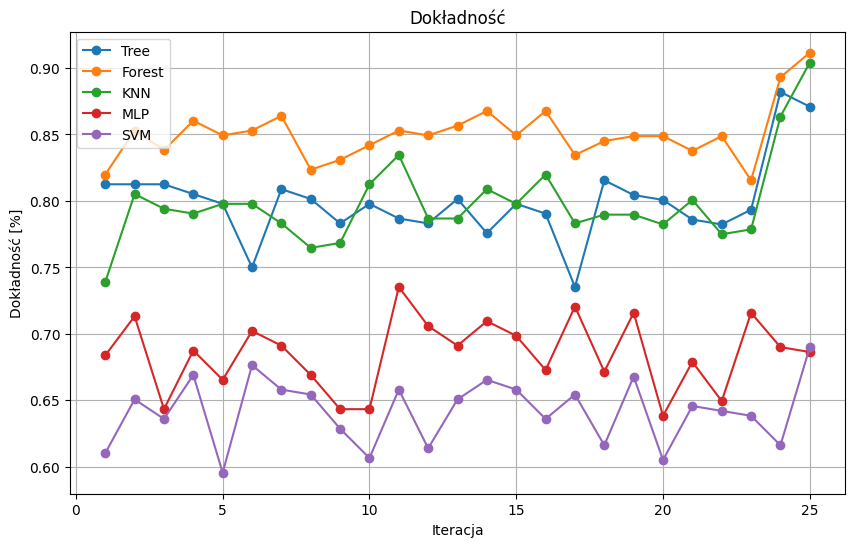

In [67]:
get_figure_for_metric('accuracy', res, "Dokładność [%]", "Dokładność")

Tree
0.7961733196331298
Forest
0.8492409351643783
KNN
0.7934113895873556
MLP
0.6720696306352001
SVM
0.6370871105244382


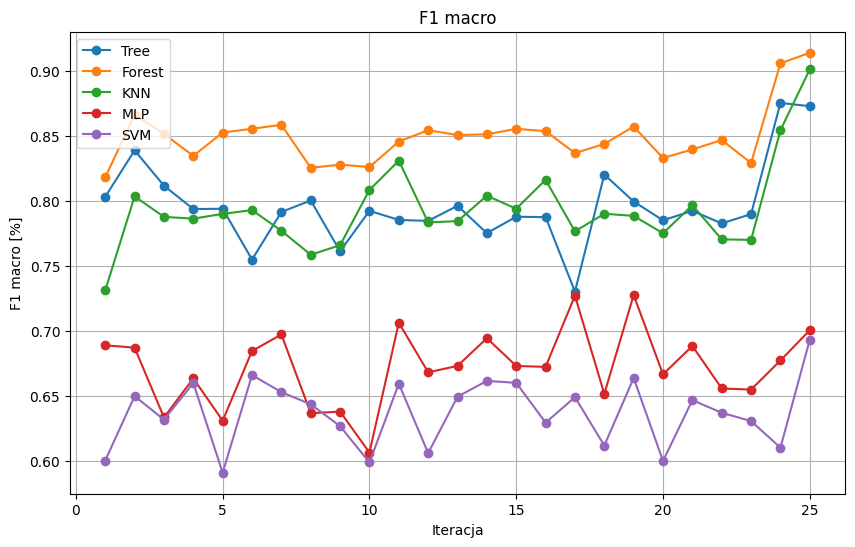

In [68]:
get_figure_for_metric('f1_macro', res, "F1 macro [%]", "F1 macro")

Tree
0.8008150640329933
Forest
0.8474739526807034
KNN
0.7981593227696984
MLP
0.6793178858259169
SVM
0.6417826134143695


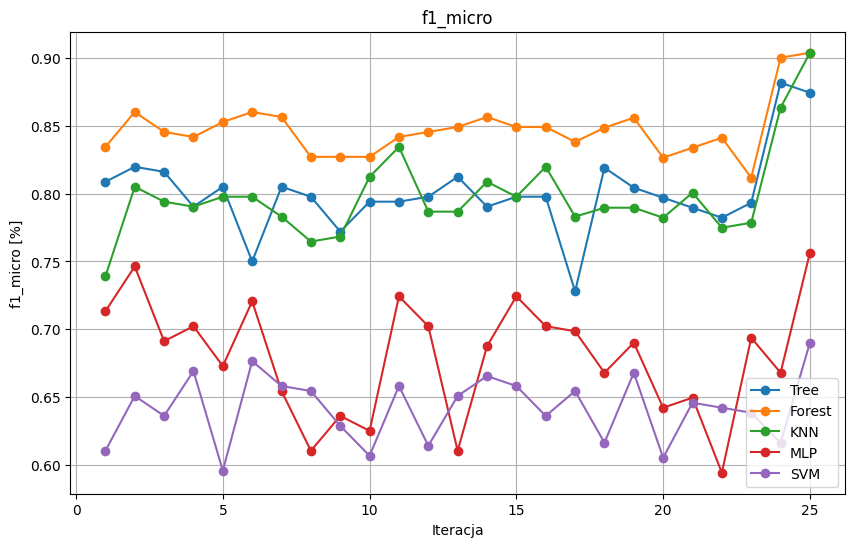

In [69]:
get_figure_for_metric('f1_micro', res, "f1_micro [%]", "f1_micro")

Tree
0.8003950834064969
Forest
0.849128621597893
KNN
0.7982133450395085
MLP
0.6931387181738367
SVM
0.6417647058823529


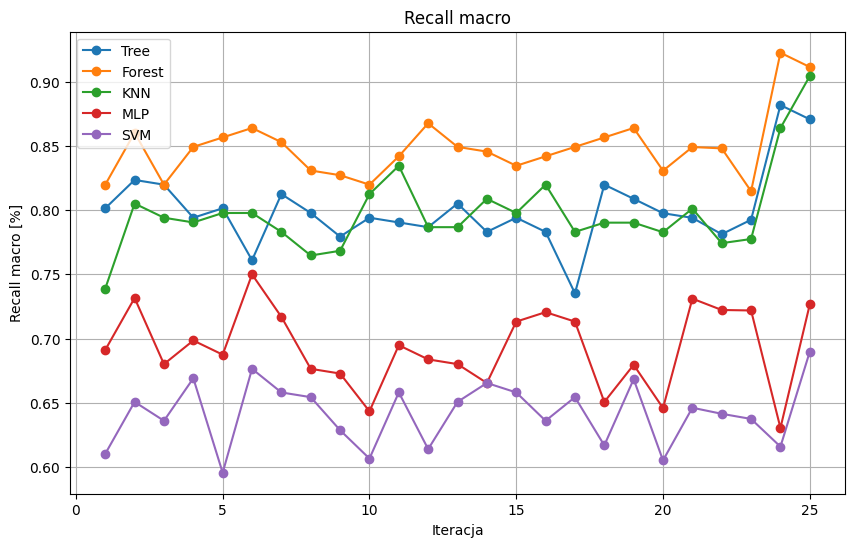

In [70]:
get_figure_for_metric('recall_macro', res, "Recall macro [%]", "Recall macro")

Tree
0.7907287794400039
Forest
0.846297688767159
KNN
0.7948213239184325
MLP
0.6715489433448569
SVM
0.6469025382806112


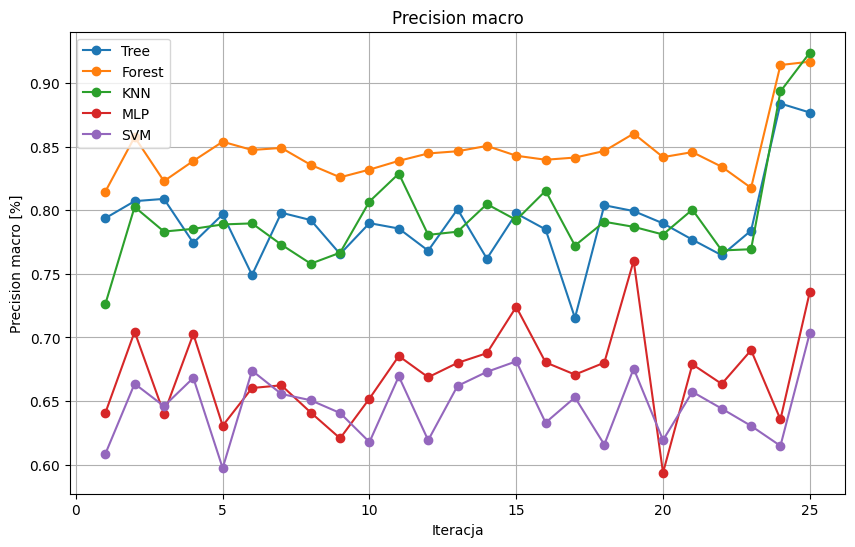

In [71]:
get_figure_for_metric('precision_macro', res, "Precision macro [%]", "Precision macro")

Tree
0.7965337247762627
Forest
0.8470911619547333
KNN
0.7933937498934138
MLP
0.6736302259190429
SVM
0.6370881037843775


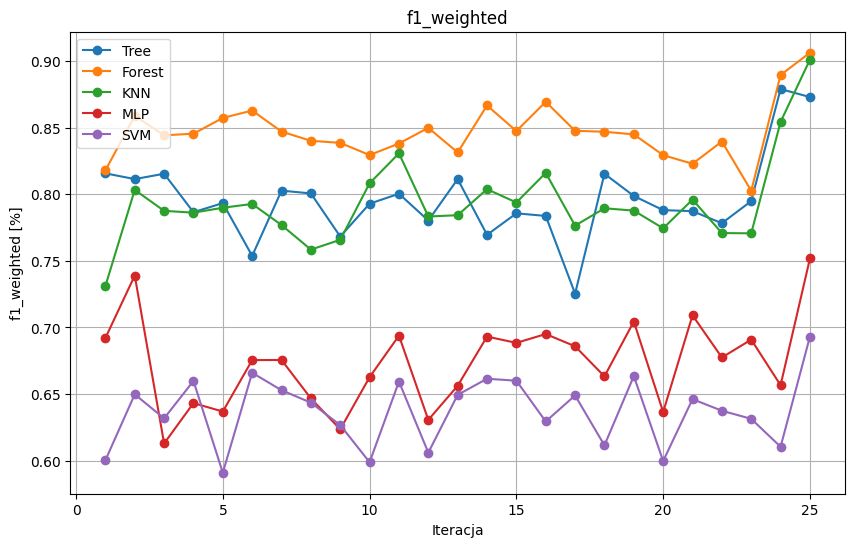

In [72]:
get_figure_for_metric('f1_weighted', res, "f1_weighted [%]", "f1_weighted")

DecisionTreeClassifier(class_weight='balanced', min_samples_split=10)
              precision    recall  f1-score   support

           2       0.33      1.00      0.50        19
           3       0.83      0.80      0.81       391
           4       0.88      0.75      0.81       425
           5       0.31      1.00      0.47        19

    accuracy                           0.78       854
   macro avg       0.59      0.89      0.65       854
weighted avg       0.83      0.78      0.80       854

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=30, min_samples_split=10)
              precision    recall  f1-score   support

           2       0.83      1.00      0.90        19
           3       0.94      0.92      0.93       391
           4       0.93      0.94      0.93       425
           5       0.95      1.00      0.97        19

    accuracy                           0.93       854
   macro avg       0.91      0

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        19
           3       0.69      0.76      0.72       391
           4       0.73      0.73      0.73       425
           5       0.00      0.00      0.00        19

    accuracy                           0.71       854
   macro avg       0.36      0.37      0.36       854
weighted avg       0.68      0.71      0.70       854

SVC(C=20)
              precision    recall  f1-score   support

           2       1.00      0.16      0.27        19
           3       0.76      0.69      0.72       391
           4       0.72      0.83      0.77       425
           5       1.00      0.16      0.27        19

    accuracy                           0.74       854
   macro avg       0.87      0.46      0.51       854
weighted avg       0.75      0.74      0.73       854



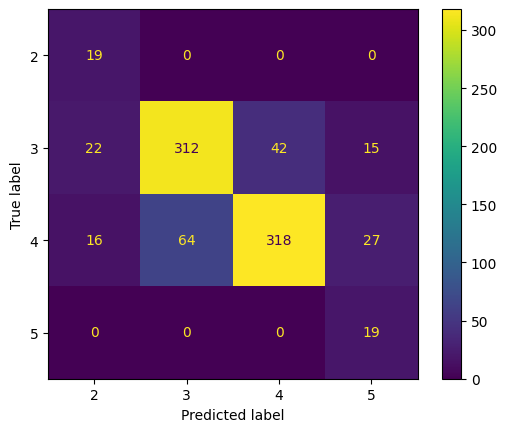

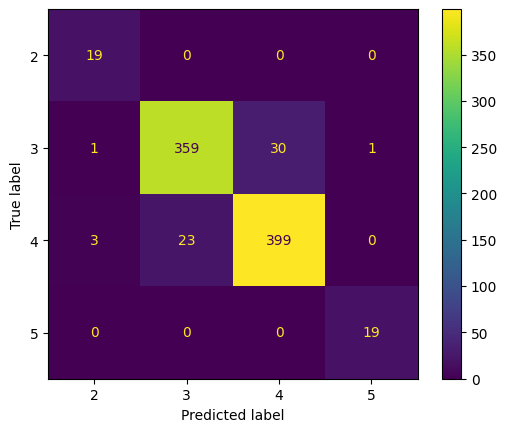

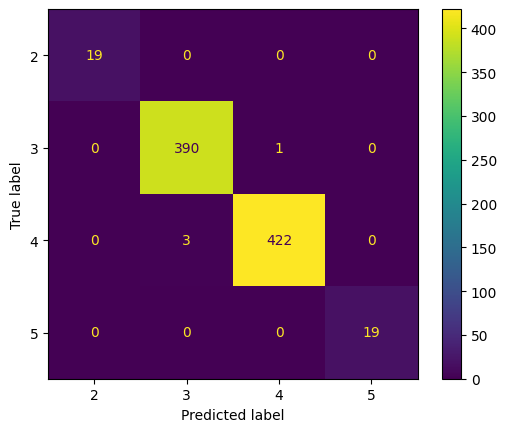

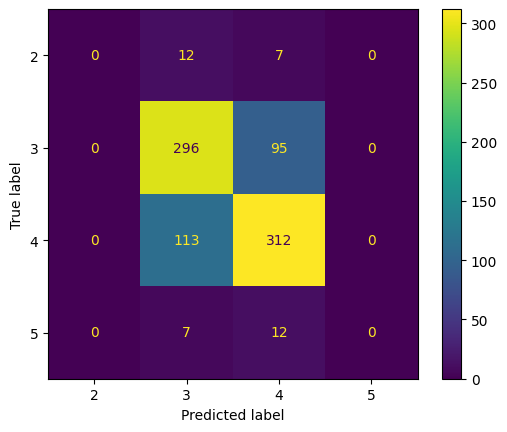

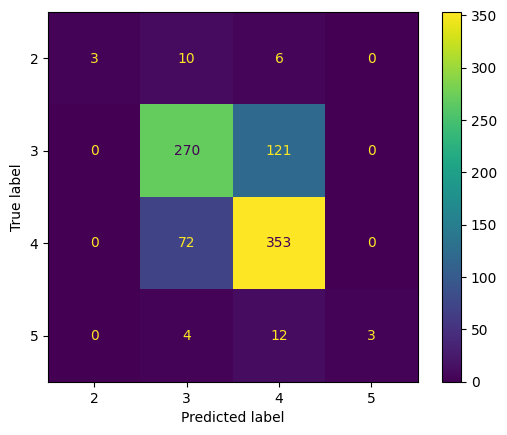

In [73]:
accuracy = []
precision = []
recall = []
f1 = []
balanced = []

test_models(X_test, Y_test) 

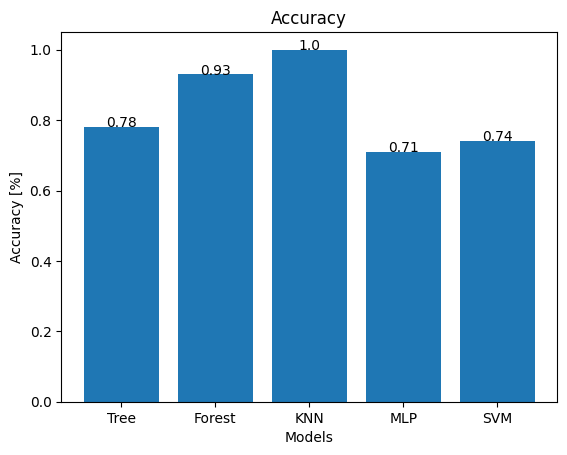

In [74]:
print_plot(accuracy, 'Accuracy', 'Accuracy [%]')

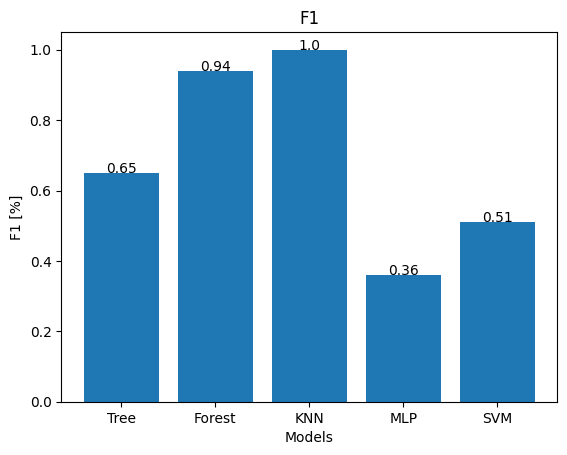

In [75]:
print_plot(f1, 'F1', 'F1 [%]')